In [79]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

-------------------------------------------------------

In [36]:
file_tagged_dataset = r'C:\Users\sujeeth.kumaravel\Desktop\nov\Novartis_Xiidra_Manual_Categorisation_Sample Data_Mar17_V1.02.xlsx'

In [37]:
df_tagged = pd.read_excel(file_tagged_dataset, sheet_name='Manually tagged')

In [38]:
df_tagged = df_tagged[['Hit Sentence', 'Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience']]

In [39]:
df_tagged_out = df_tagged[['Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience']]

In [40]:
df_tagged_out.isnull().sum()

Cost                      818
Efficacy                  897
Safety                    981
Compliance/ adherence     947
Comfort/ convenience     1003
dtype: int64

In [41]:
df_tagged_out.fillna(0, inplace=True)

In [42]:
df_tagged_out.isnull().sum()

Cost                     0
Efficacy                 0
Safety                   0
Compliance/ adherence    0
Comfort/ convenience     0
dtype: int64

In [43]:
df_tagged_out['Cost'].dtype

dtype('O')

In [44]:
df_tagged_out['Cost'] = pd.to_numeric(df_tagged_out['Cost'], errors='coerce')

C:\Anaconda\envs\dsmlai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_km = pd.DataFrame(df_tagged_out.idxmax(axis=1))

In [56]:
df_km.columns=['keymessage']

In [57]:
df_km.columns

Index(['keymessage'], dtype='object')

In [58]:
df_km.head()

,keymessage
0,Efficacy
1,Efficacy
2,Efficacy
3,Efficacy
4,Efficacy


In [59]:
df_text_km = pd.concat([df_tagged, df_km], axis=1)

In [60]:
df_text_km.columns

Index(['Hit Sentence', 'Cost', 'Efficacy', 'Safety', 'Compliance/ adherence',
       'Comfort/ convenience', 'keymessage'],
      dtype='object')

In [61]:
df_text_km.drop(['Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience'], axis=1, inplace=True)

In [62]:
df_text_km.columns

Index(['Hit Sentence', 'keymessage'], dtype='object')

In [71]:
df_text_km.keymessage.value_counts()

Cost                     776
Efficacy                 121
Compliance/ adherence     71
Safety                    47
Comfort/ convenience      30
Name: keymessage, dtype: int64

In [66]:
df_text_km['keymessage_encode'] = df_text_km['keymessage'].astype('category').cat.codes

In [82]:
df_Cost = df_text_km.loc[df_text_km['keymessage'] == 'Cost']
df_Safety = df_text_km.loc[df_text_km['keymessage'] == 'Safety']
df_Efficacy = df_text_km.loc[df_text_km['keymessage'] == 'Efficacy']
df_ComplianceAdherence = df_text_km.loc[df_text_km['keymessage'] == 'Compliance/ adherence']
df_ComfortConvenience = df_text_km.loc[df_text_km['keymessage'] == 'Comfort/ convenience']

In [68]:
type(df_Cost)

pandas.core.frame.DataFrame

In [70]:
df_Cost.shape

(776, 3)

In [84]:
lst_Cost = list(df_Cost['Hit Sentence'])
lst_Safety = list(df_Safety['Hit Sentence'])
lst_Efficacy = list(df_Efficacy['Hit Sentence'])
lst_ComplianceAdherence = list(df_ComplianceAdherence['Hit Sentence'])
lst_ComfortConvenience = list(df_ComfortConvenience['Hit Sentence'])

---------------------------------------------------------------------------------------------------------------

In [74]:
from wordcloud import WordCloud

In [75]:
def wordcloud_cluster(lst_sent):
    
    cloud = " ".join(lst_sent)
    wordcloud = WordCloud(width = 1600, height = 1200,
                         background_color = 'black',
                         stopwords = set(nltk.corpus.stopwords.words('english')),
                         min_font_size=10).generate(cloud)
    
    # plot the word cloud image
    plt.figure(figsize=(8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

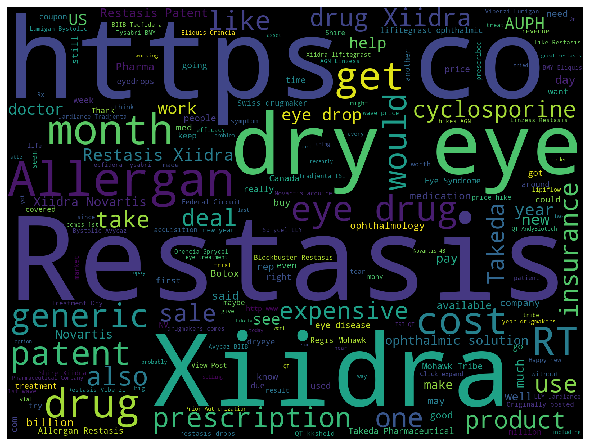

In [80]:
wordcloud_cluster(lst_Cost)

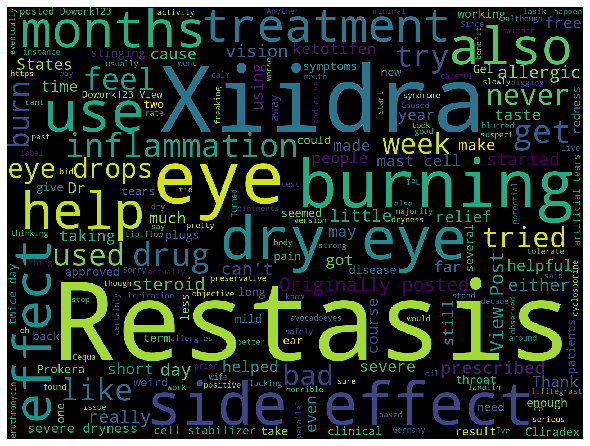

In [85]:
wordcloud_cluster(lst_Safety)

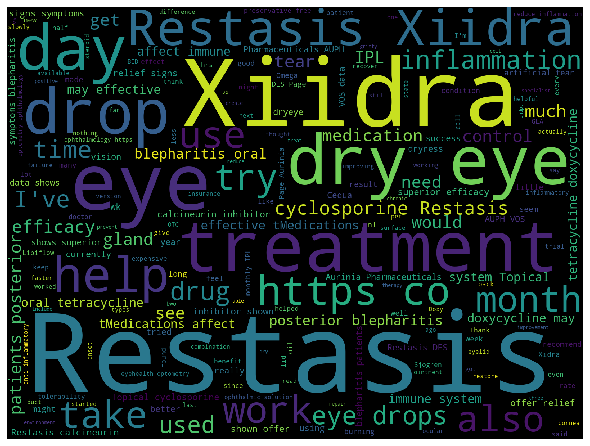

In [86]:
wordcloud_cluster(lst_Efficacy)

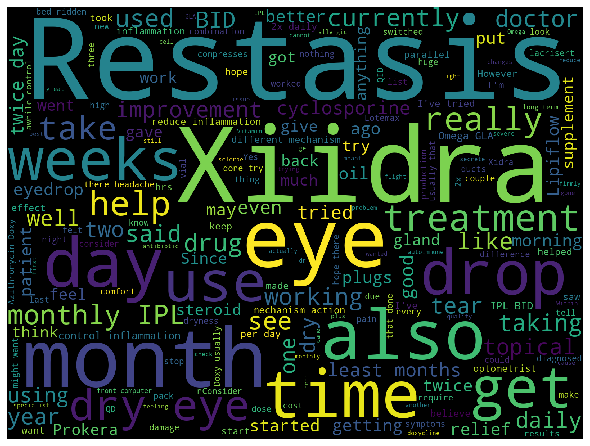

In [87]:
wordcloud_cluster(lst_ComplianceAdherence)

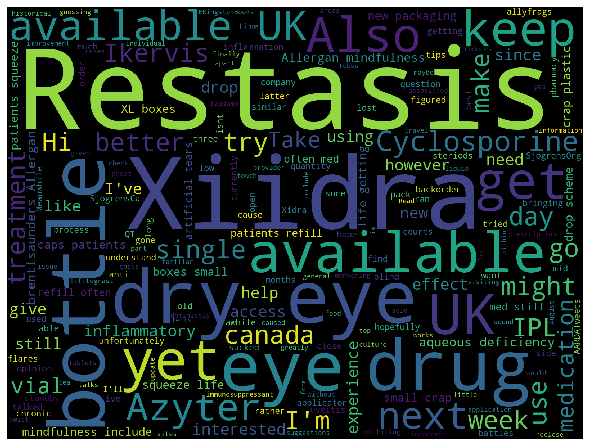

In [88]:
wordcloud_cluster(lst_ComfortConvenience)

-----------------------------------------------------------------------------------------

# Cleaning